# HR SALARY PREDICTION DASHBOARD

**Problem Statement**

The goal of this project is to clean the data, analysis and predict whether a person's salary is higher or lower than $50k/year based on their attributes using several ML classification techniques.

### Importing the collected data to python environment


In [1]:
#from google.colab import files
#files.upload()

### Loading the dataset into Python enviornment

In [2]:
#import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Libraries for data visualization
import matplotlib.pyplot as plt  
import seaborn as sns 
from pandas.plotting import scatter_matrix
from collections import Counter


# Import scikit_learn module for the algorithm/model:

from sklearn.linear_model import LogisticRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 

# Import scikit_learn module for k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# import the metrics class
from sklearn import metrics

import statsmodels.api as sm

# Import sys and warnings to ignore warning messages 
import sys
import warnings
%matplotlib inline

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
data=pd.read_csv(r'C:\Users\Shiffa Saleem\Desktop\Assignments\intership\salary.csv')

In [4]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,Salary
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


### Understanding the dataset

In [6]:
data.shape

(48842, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  Salary           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
def data_info(data):
    print('Number of Columns in the dataset: ',data.shape[1])
    print('Number of rows in the dataset: ',data.shape[0])
    print('Total number of datapoints in the dataset:',data.size)
    numerical_features = [f for f in data.columns if data[f].dtypes!='O']
    print('Count of Numerical Features:',len(numerical_features))
    cat_features = [c for c in data.columns if data[c].dtypes=='O']
    print('Count of Categorical Features:',len(cat_features))
data_info(data)

Number of Columns in the dataset:  15
Number of rows in the dataset:  48842
Total number of datapoints in the dataset: 732630
Count of Numerical Features: 6
Count of Categorical Features: 9


In [9]:
def unique_checker(data):
    """loops and prints unique values in each column"""
    for col in data.columns:
        print("Unique values in {} feature.".format(col))
        print(data[col].unique(),"\n")
        print("*"*40)

In [10]:
unique_checker(data) #scroll / toggle output to view all outputs

# Note:
## this step is just for the Data Understanding part
### Not intergral to the straightforward analysis 

Unique values in age feature.
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86] 

****************************************
Unique values in workclass feature.
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

****************************************
Unique values in fnlwgt feature.
[226802  89814 336951 ... 129912 255835 257302] 

****************************************
Unique values in education feature.
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool'] 

****************************************
Unique values in educational-num feature.
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1] 

***********************************

In [11]:
def count_checker(data):
    """count of each value under each feature in the data"""
    for col in data.columns:
        print("Count for each category of values in {} feature.".format(col))
        print(data[col].value_counts(),"\n")
        print("*"*40)

In [12]:
count_checker(data) #scroll / toggle output to view all outputs
# Note:
## this step is just for the Data Understanding part
### Not intergral to the straightforward analysis 

Count for each category of values in age feature.
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64 

****************************************
Count for each category of values in workclass feature.
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64 

****************************************
Count for each category of values in fnlwgt feature.
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
82649      1
193304     1
227689     1
135891     1
250034     1
Name: fnlwgt, Length: 28523, dtype: int64 

****************************************
Count for each category of values in education feature.
HS-grad         15784
Some-college    10878
Bachel

**Findings**

- The dataset contains 48,842 entries with a total of 15 columns representing different attributes of the people. Here’s the list;

1. Age: Discrete (from 17 to 90)
2. Work class (Private, Federal-Government, etc): Nominal (9 categories)
3. Final Weight (the number of people the census believes the entry represents): Discrete
4. Education (the highest level of education obtained): Ordinal (16 categories)
5. Education Number (the number of years of education): Discrete (from 1 to 16)
6. Marital Status: Nominal (7 categories)
7. Occupation (Transport-Moving, Craft-Repair, etc): Nominal (15 categories)
8. Relationship in family (unmarried, not in the family, etc): Nominal (6 categories)
9. Race: Nominal (5 categories)
10. Sex: Nominal (2 categories)
11. Capital Gain: Continous
12. Capital Loss: Continous
13. Hours (worked) per week: Discrete (from 1 to 99)
14. Native Country: Nominal (42 countries)
15. Salary (whether or not an individual makes more than 50,000 dollar annually):     Boolean (≤50k, >50k)

In [13]:
#creating a Dataframe from the given dataset
df = pd.DataFrame(data)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Salary'],
      dtype='object')

### Renaming the columns

In [17]:
#replacing some special character columns names with proper names 
df.rename(columns={'capital-gain': 'capital_gain', 'capital-loss': 'capital_loss', 'native-country': 'country','hours-per-week': 'hours_per_week','marital-status': 'marital'}, inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'country', 'Salary'],
      dtype='object')

### Data Cleaning

### 1. Missing Values

In [18]:
 #check the missing value
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital            0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
country            0
Salary             0
dtype: int64

**Above sum shows there are no null values in the dataset.**

In [20]:
#we can see that there are some special characters in the data like ‘?’.
#Finding the special characters in the data frame
df.isin(['?']).sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital               0
occupation         2809
relationship          0
race                  0
gender                0
capital_gain          0
capital_loss          0
hours_per_week        0
country             857
Salary                0
dtype: int64

**Findings**

- we see that there is a special character as " ?" for columns workcalss, Occupation, and country, we need to clean those data. 
- In this case, as the missing value fall into the categorical features, we will use the pandas DataFrame mode() method to fill the missing value.

In [21]:
#Handling missing values
# the code will replace the special character to nan  
df['country'] = df['country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)



In [22]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital               0
occupation         2809
relationship          0
race                  0
gender                0
capital_gain          0
capital_loss          0
hours_per_week        0
country             857
Salary                0
dtype: int64

In [23]:
#we will use the pandas DataFrame mode() method to fill the missing value.
df = df.fillna(df.mode().iloc[0])

In [24]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital            0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
country            0
Salary             0
dtype: int64

### 2. Remove duplicate data 

In [25]:
#Checking for duplicated entries
sum(df.duplicated(df.columns))

53

In [26]:
#Delete the duplicates and check that it worked
df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))

0

In [27]:
df.shape

(48789, 15)

In [28]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'country', 'Salary'],
      dtype='object')

In [ ]:
3.

### 3. Handling Outliers

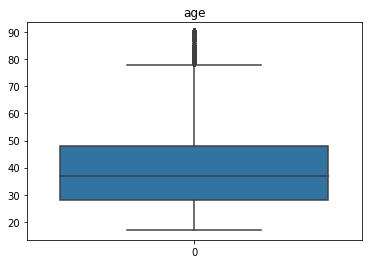

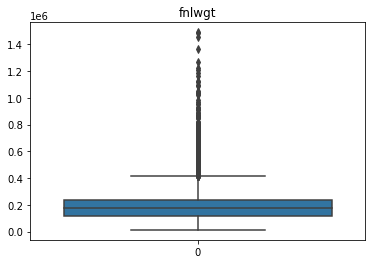

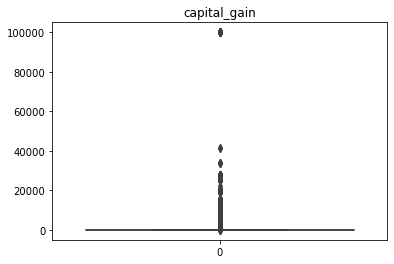

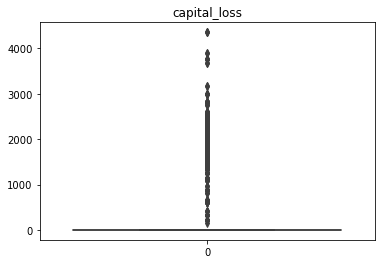

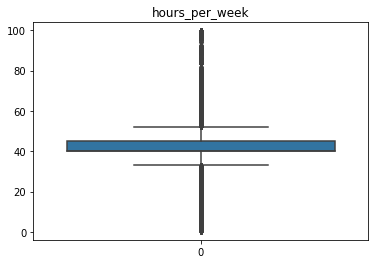

In [29]:
## checking outliers
for i in ['age', 'fnlwgt',
       'capital_gain','capital_loss','hours_per_week'] :
    plt.title(i)
    sns.boxplot(data=df[i])
    plt.show()  


In [30]:
df1=df
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,country,Salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


### Handling Outliers with age

In [31]:
q1 = np.percentile(df1['age'],25,interpolation='midpoint')
q3 = np.percentile(df1['age'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df1['age'][(df1['age']<low_limit)|(df1['age']>high_limit)].index
df1.drop(index,inplace=True)

### Handling Outliers with fnlwgt

In [32]:
q1 = np.percentile(df1['fnlwgt'],25,interpolation='midpoint')
q3 = np.percentile(df1['fnlwgt'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df1['fnlwgt'][(df1['fnlwgt']<low_limit)|(df1['fnlwgt']>high_limit)].index
df1.drop(index,inplace=True)

### Handling Outliers with capital_gain

In [33]:
q1 = np.percentile(df1['capital_gain'],25,interpolation='midpoint')
q3 = np.percentile(df1['capital_gain'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df1['capital_gain'][(df1['capital_gain']<low_limit)|(df1['capital_gain']>high_limit)].index
df1.drop(index,inplace=True)

### Handling Outliers with capital_loss

In [ ]:
q1 = np.percentile(df1['capital_loss'],25,interpolation='midpoint')
q3 = np.percentile(df1['capital_loss'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df1['capital_loss'][(df1['capital_loss']<low_limit)|(df1['capital_loss']>high_limit)].index
df1.drop(index,inplace=True)

### Handling Outliers with hours_per_week

In [34]:
q1 = np.percentile(df1['hours_per_week'],25,interpolation='midpoint')
q3 = np.percentile(df1['hours_per_week'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df1['hours_per_week'][(df1['hours_per_week']<low_limit)|(df1['hours_per_week']>high_limit)].index
df1.drop(index,inplace=True)

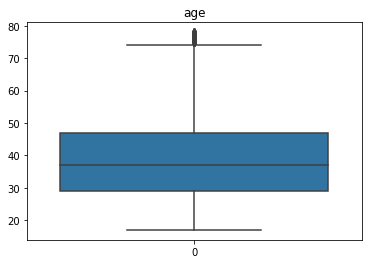

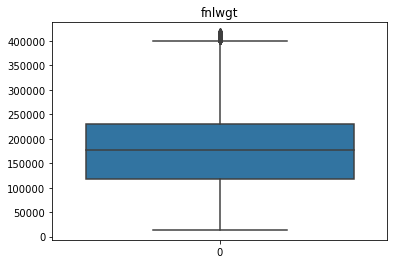

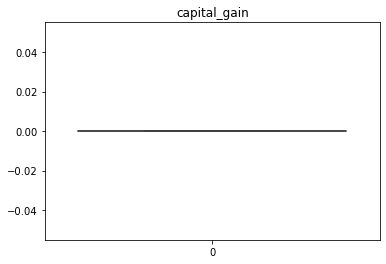

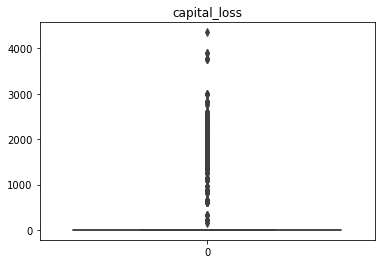

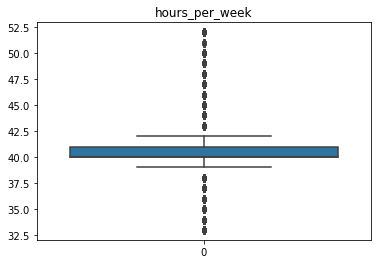

In [35]:
## checking outliers
for i in ['age', 'fnlwgt',
       'capital_gain','capital_loss','hours_per_week'] :
    plt.title(i)
    sns.boxplot(data=df1[i])
    plt.show() 

### 4. Feature Reduction and Feature engineering

While analyzing the dataset, it is clear that capital-gain & capital_loss have no significance in salary prediction. so we can drop it. The column,education-num is the numerical version of the column education, so we also drop it.

In [38]:
df1.drop(['capital_gain','capital_loss','educational-num'], axis = 1,inplace = True)
df1.head()

,age,workclass,fnlwgt,education,marital,occupation,relationship,race,gender,hours_per_week,country,Salary
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
6,29,Private,227026,HS-grad,Never-married,Prof-specialty,Unmarried,Black,Male,40,United-States,<=50K
8,24,Private,369667,Some-college,Never-married,Other-service,Unmarried,White,Female,40,United-States,<=50K


In [39]:
df1.shape

(31262, 12)

Now, we need to convert the categorical values to numeric for modeling. Looking at the Marital-status col, there are nearly 6 different values which would mean the same as two values of being married ot no married, therefore we convert them into only two values.

In [41]:
df1.replace(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent','Never-married','Separated','Widowed'],
             ['divorced','married','married','married','not married','not married','not married'], inplace = True)

In [43]:
df1['marital'].value_counts()

married        14904
not married    11624
divorced        4734
Name: marital, dtype: int64